# ( Data Analysis for "Ford GoBike System" Dataset)
## by (Abdelrahman Rashed)

## Investigation Overview

> My goal here in this notebook to analyze the various parameters in this dataset (Ford GoBike). The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. In this analysis notebook, I will investegate different variables and the relation between them to try to deduce some relation and to be able to predict some actions. Like an example here, I will investigate the relation btween trip duation and week of the day or month of the year. Also relation between the member ages and their type whether they are customers or subscribers. 

## Dataset Overview

> Here I have used a "Fordgobike" dataset in the period from [01/2018] till [12/2018] which describes the individual usage of the bike-sharing system by the users. The data provided various data to descibe the behavior such as (trip duration, user age, user gender, trip start hour, day, week and month).

> You can find the path to the dataset [here]

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [1]:
# load in the dataset into a pandas dataframe
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('FordBike.csv')

In [3]:
df[["year", "month", "day"]] = df['start_time'].str.split("-", expand = True)

In [4]:
df['year'] = df['year'].astype(float)
df['Member_age'] = df['year'] - df['member_birth_year']

In [5]:
df.dropna(inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Day per week)

> It is shown here that the drop down in the count of trip during the weekend. This means that the people use the bikes in daily basis. And this also indicate that the users the bike in their normal daily routine.
> This also can show and expresss the robustness and sucess of the system of 'Ford GoBike' that it is able to be reliable and dependable.
> The previous point is also solidated the plot of section "2.8", where the number of subscribers is larger than the number of the customer users.
> Another side point that show the sucess of the system, is that the average age of the users. The average age is around (20-40) which are the group of people that can use public transporation but they have choosed the system. But they are depending on the "Ford GoBike" system and this is indication I'm talking about. 

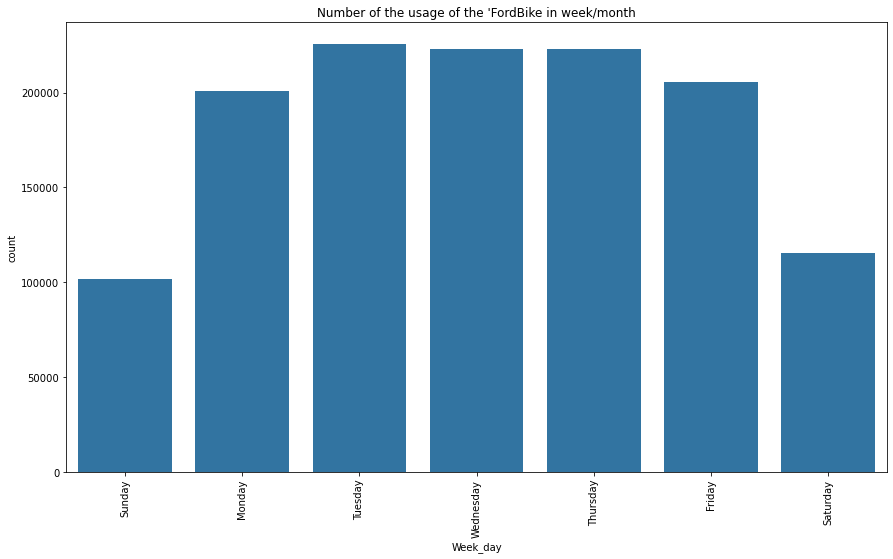

In [11]:
df['start_time'] = pd.to_datetime(df['start_time'])

# Generate the weekday from the 'start_time' column.
df['Week_day'] = df.start_time.dt.strftime('%A')

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

#Adjust the order of the week days inside the 'df' to be plotted
classes = pd.api.types.CategoricalDtype(categories = days, ordered = True)

#convert the 'week_days' column to ordered categorical type
df['Week_day'] = df['Week_day'].astype(classes);

base = sb.color_palette()[0]
plt.figure(figsize = [14.70,8.27])
sb.countplot(data = df, x = 'Week_day', color = base);
plt.xticks(rotation = 90);
plt.title("Number of the usage of the 'FordBike in week/month");

## (week day vs user type )

- Comment: By Comparing the relation between the number of the users in the weekend and the weekdays taking in consideration the two cateogires of the user.
- We can see that for subscriber users, they use the system more often in the weekdays compared to the weekend.
- While in the other hand for the customer users it is opposite relationship they use the system more often in the weekend. 

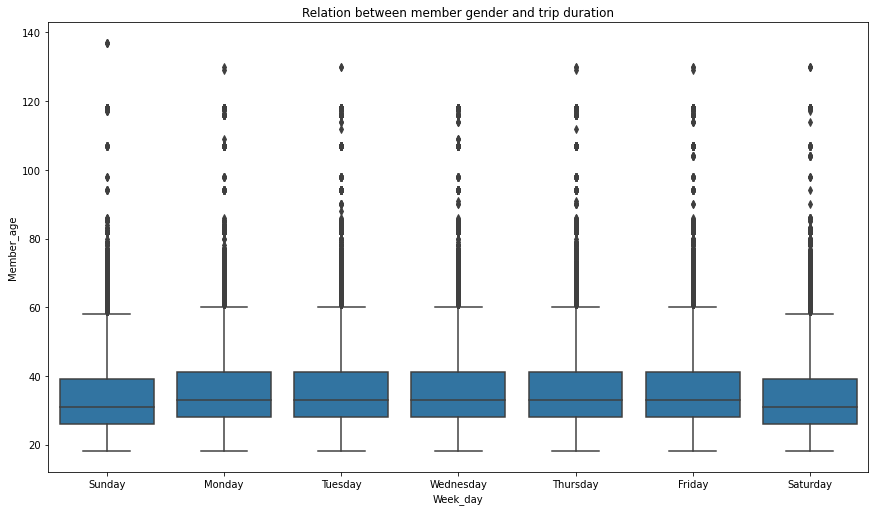

In [10]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [14.70,8.27])
sb.boxplot(data = df, x = 'Week_day', y = 'Member_age', color = base_color);
plt.title("Relation between member gender and trip duration");

## (Month vs user type vs member gender)

- Although it is not easy to deduce alot from this graph, but we can see that starting from 'May' the number of trips for both groups starts to increase. This is normal related to the customer users as I have insight from the previous sections that the customer users are students and they will use the system in the summer months.
- In the other hand of the "subscriber" users, starting from 'May' the number of trips starts to increase. And this is not what I was expecting as I have the opposite insight that they are workers and tight to a daily routine. 
- I can deduce or relate this finding to the 'Weather' which is a common conditon for both groups. In winter the temperature is lower than in the summer as well as the possibility of rainy and snowy days is bigger.This could describe the difference in the number of the trips between winter months and summer months.

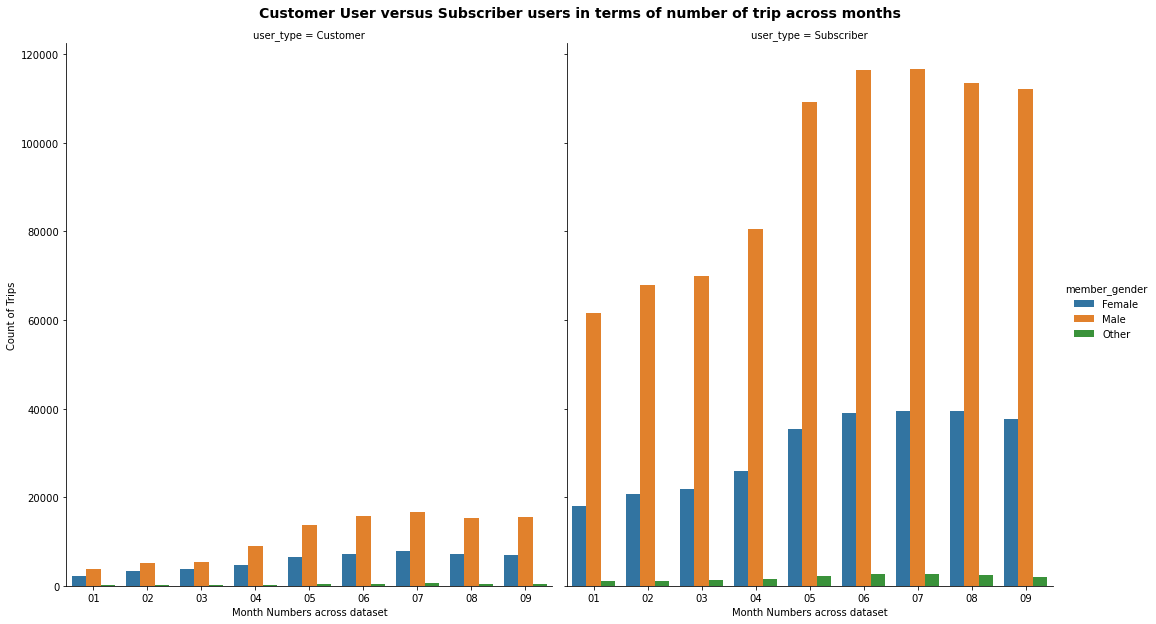

In [16]:
g = sb.catplot(data = df, x = 'month', col = 'user_type', hue = 'member_gender', kind = 'count',
          order = sorted(df.month.unique()), height =8.27/1, aspect = (14.70/2)/(8.27/1));
plt.suptitle("Customer User versus Subscriber users in terms of number of trip across months", y = 1.02,
            fontsize = 14, weight = "bold");
g.set_axis_labels(x_var = "Month Numbers across dataset", y_var = "Count of Trips");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!